## Imports

In [1]:
from IPython.display import Javascript
import ipywidgets as widgets

# Data
import numpy as np
import pandas as pd
import missingno as msno

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# **Exploratory Data Analysis**

## **Questions**

### Load the data

In [2]:
path = "../master-thesis/data/uke_data_wide.parquet"

# Load the dataset
uke_df = pd.read_parquet(path)
print("Dataset loaded...")

Dataset loaded...


### Datatypes and samples

In [3]:
# Shape of the dataframe
print("Uke dataframe shape (rows,columns): ", uke_df.shape)

Uke dataframe shape (rows,columns):  (591597, 85)


In [33]:
# Description of the columns
print('Data: '+'\x1b[1;31m'+'uke_df'+'\x1b[0m'+ ", nrows: {}, ncols: {}".format(uke_df.shape[0],uke_df.shape[1]))
print("\033[1m\033[4m\033[95m{:<27} :  {:<7}  {:<50} |  {:>9} {:>9} {:>9} {:>10} {:>10} ({:>4}%)\033[0m".format("column", "type", "samples", "Mean", "Median", "Min", "Max", "Nans", "Nans"))
for column in uke_df.columns:
    
    column_type = str(uke_df.dtypes[column])
    
    samples = uke_df[column].dropna().sample(10).tolist()
    if column_type == "string":
        samples = ["'"+value+"'" for value in samples]
        samples = "  ".join([str(value) for value in samples])[:50]
    else:
        samples = "  ".join([str(round(value,2)) for value in samples])[:50]
    
    mean = "-"
    median = "-"
    mini = "-"
    maxi = "-"
    if column_type != "string":
        mean = round(uke_df[column].mean(),2)
        median = round(uke_df[column].median(),2)
        mini = round(uke_df[column].min(),2)
        maxi = round(uke_df[column].max(),2)
    
    nans_perc = round(uke_df[column].isnull().sum() * 100 / len(uke_df[column]),1)
    nans = uke_df[column].isnull().sum()
    
    out = "{:<27} :  {:<7}  {:<50} |  {:>9} {:>9} {:>9} {:>10} {:>10} ({}%)".format(column, column_type, samples, str(mean), str(median), str(mini), str(maxi), nans, nans_perc)
    print(out)

Data: uke_df, nrows: 591597, ncols: 85
column                      :  type     samples                                            |       Mean    Median       Min        Max       Nans (Nans%)
pat_id                      :  string   '554446563'  '563485257'  '554617585'  '516581995' |          -         -         -          -          0 (0.0%)
rel_time                    :  int64    4740  27660  5340  17640  11460  33060  21900  504 |   22812.62   16680.0         0    3252900          0 (0.0%)
af_vital                    :  float64  17.5  27.67  16.0  23.0  22.0  15.0  20.0  25.0  2 |       19.9      19.0       0.0      148.0     197380 (33.4%)
alt_labor                   :  float64  313.0  606.0  36.0  37.0  103.0  263.0  20.0  28.0 |     130.71      50.0       4.0     8430.0     584170 (98.7%)
ast_labor                   :  float64  42.0  160.0  29.0  45.0  21.0  171.0  44.0  44.0   |     189.47      45.0       4.0    17431.0     584741 (98.8%)
albumin_labor               :  float64 

In [5]:
# dataframe head
uke_df.head()

,pat_id,rel_time,af_vital,alt_labor,ast_labor,albumin_labor,alk_labor,alpha_blocker_med,barbiturat_med,basophile_labor,...,diast_vital,ft3_labor,ft4_labor,mittl_nbd_vital,mittl_vital,ph_bga,pankreasspez_labor,so2_bga,syst_nbd_vital,syst_vital
30,474096103,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,130.0
31,474096103,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.5,NaN,NaN,NaN,93.0,NaN,NaN,NaN,NaN,134.0
32,474096103,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.0,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,133.0
33,474096103,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.0,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,128.0
34,474096103,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,125.0


In [6]:
# dataframe tail
uke_df.tail()

,pat_id,rel_time,af_vital,alt_labor,ast_labor,albumin_labor,alk_labor,alpha_blocker_med,barbiturat_med,basophile_labor,...,diast_vital,ft3_labor,ft4_labor,mittl_nbd_vital,mittl_vital,ph_bga,pankreasspez_labor,so2_bga,syst_nbd_vital,syst_vital
591622,597077779,1080,29.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.666667,NaN,NaN,NaN,61.666667,NaN,NaN,NaN,NaN,62.666667
591623,597077779,1140,36.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.000000,NaN,NaN,NaN,61.000000,NaN,NaN,NaN,NaN,62.000000
591624,597077779,1200,35.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.500000,NaN,NaN,NaN,60.500000,NaN,NaN,NaN,NaN,62.000000
591625,597077779,1260,34.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.500000,NaN,NaN,NaN,62.000000,NaN,NaN,NaN,NaN,63.500000
591626,597077779,1320,30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.000000,NaN,NaN,NaN,64.000000,NaN,NaN,NaN,NaN,65.000000


### Data distribution

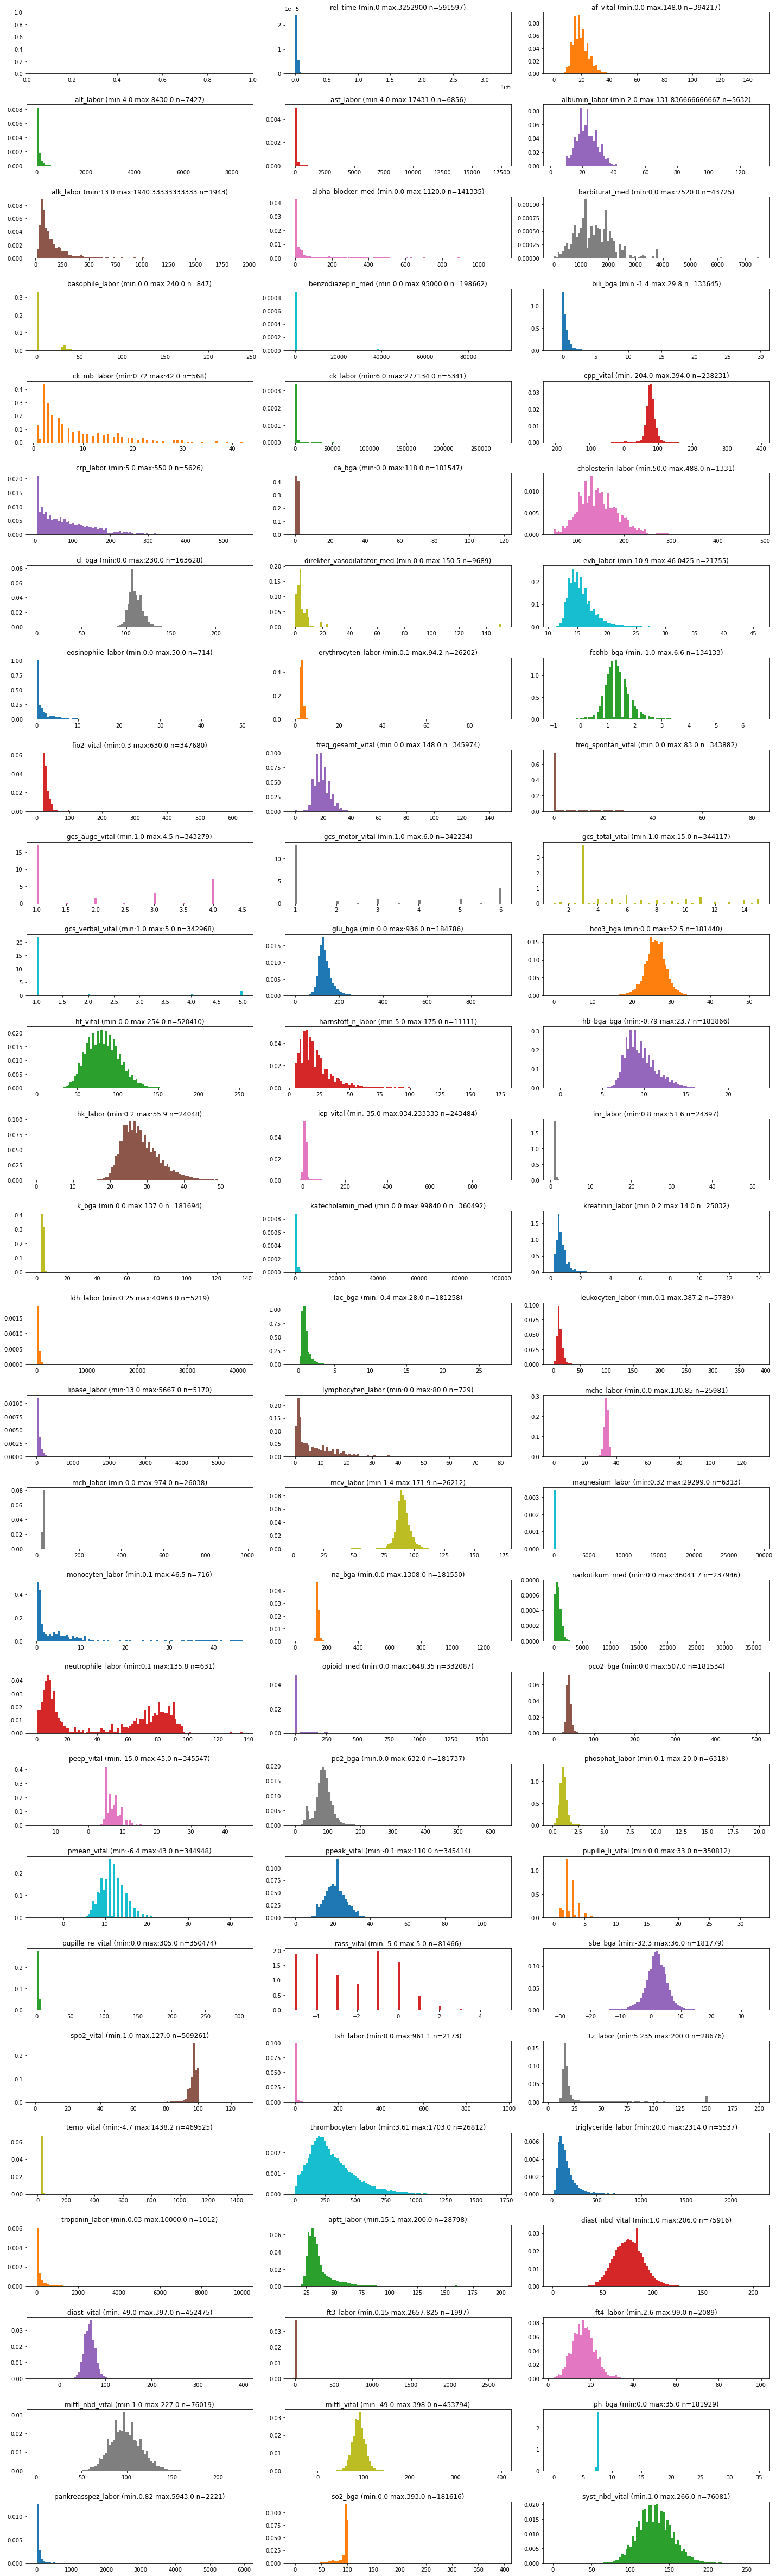

In [7]:
fig, axs = plt.subplots(28, 3)
fig.set_figheight(66)
fig.set_figwidth(20)

colors = plt.rcParams["axes.prop_cycle"]()

for i, ax in enumerate(fig.axes):
        
        if i < len(uke_df.columns) and uke_df.columns[i] != "pat_id":
            
            # get column name
            column_name = uke_df.columns[i]
            print("Creating column {}/{} - {}".format(i, len(uke_df.columns), column_name), end="\r")
            
            # Extract data
            series = uke_df[column_name].dropna()
            
            # Create subplot
            color = next(colors)["color"]
            
            ax.hist(series, density=True, bins=100, color= color, range=(series.min(), series.max()))
            ax.set_title(column_name+" (min:{} max:{} n={})".format(series.min(),series.max(), series.count()))

            
fig.tight_layout()        
fig.savefig("../master-thesis/figures/column_distribution.png")

### Data BoxPlot

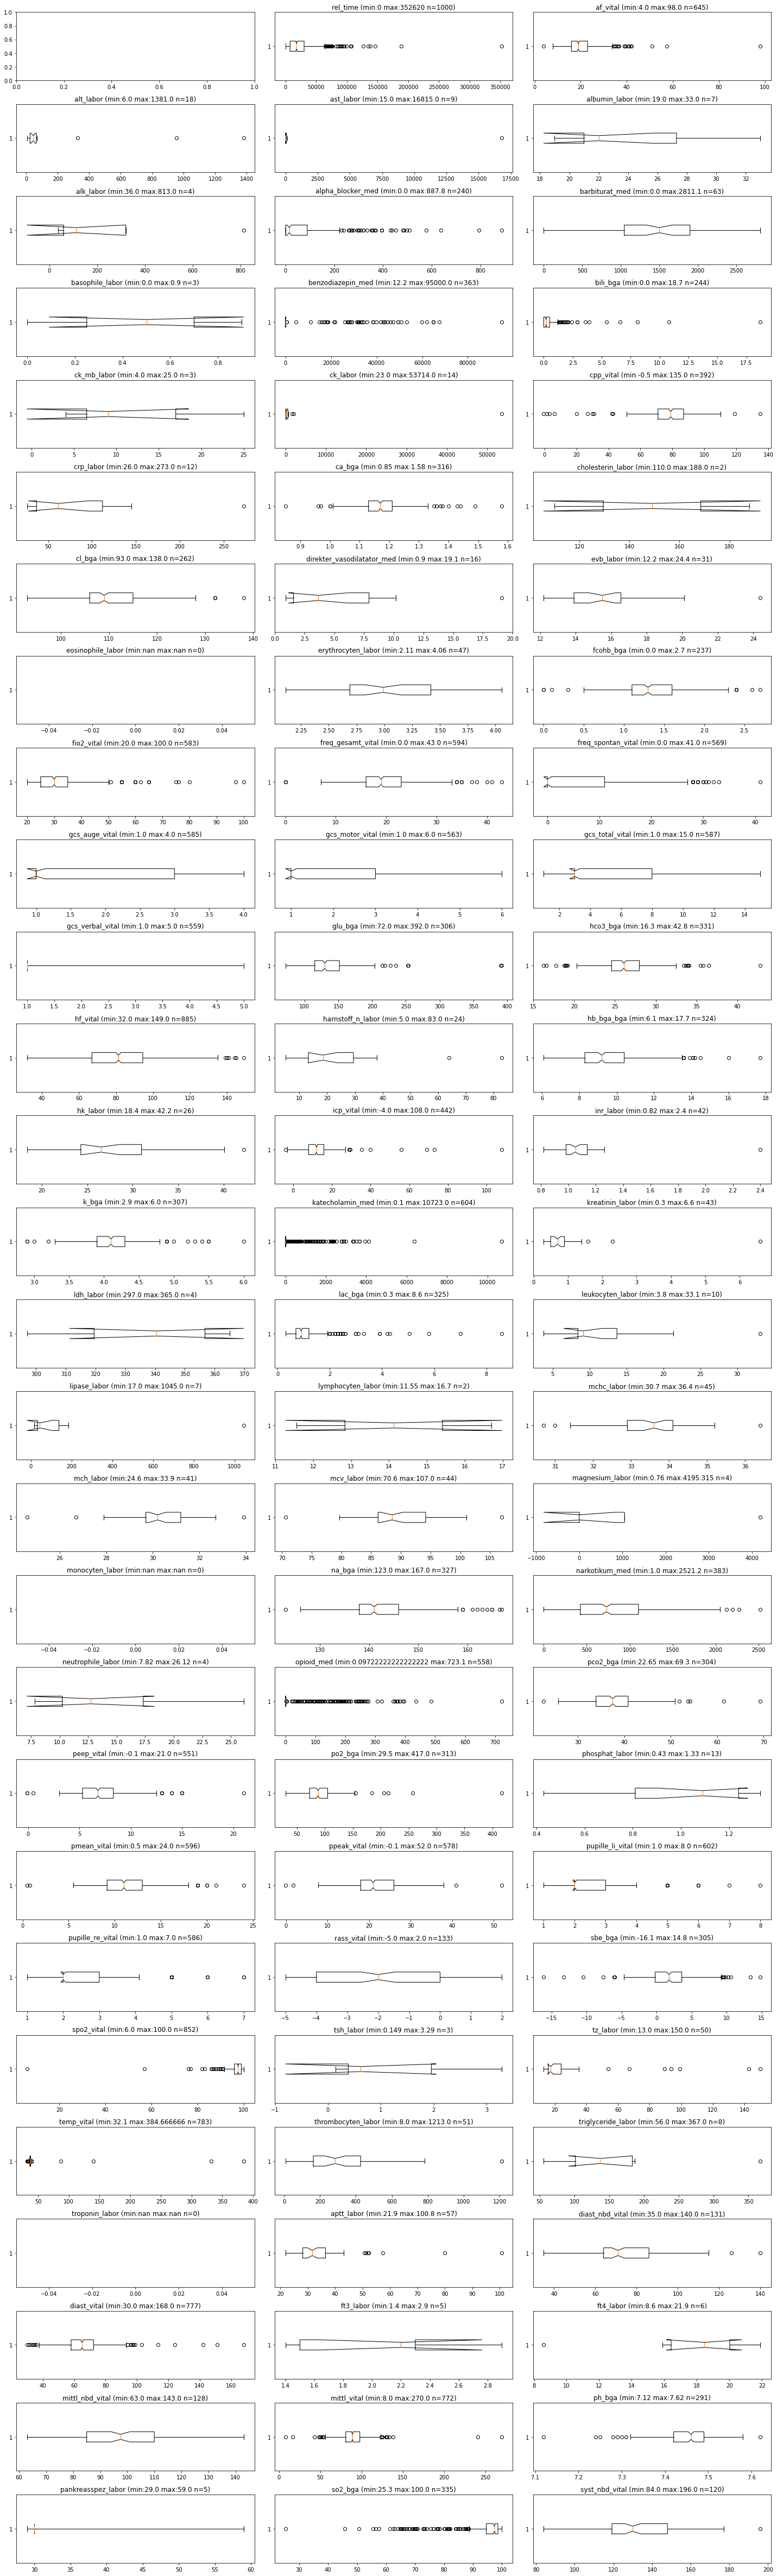

In [8]:
fig, axs = plt.subplots(28, 3)
fig.set_figheight(66)
fig.set_figwidth(20)

colors = plt.rcParams["axes.prop_cycle"]()

for i, ax in enumerate(fig.axes):
        
        if i < len(uke_df.columns) and uke_df.columns[i] != "pat_id":
            
            # get column name
            column_name = uke_df.columns[i]
            print("Creating column {}/{} - {}".format(i, len(uke_df.columns), column_name), end="\r")
            
            # Extract data
            series = uke_df[column_name].sample(1000).dropna()
            
            # Create subplot
            color = next(colors)["color"]
            
            ax.boxplot(series, vert=False, notch=True, autorange=True)
            ax.set_title(column_name+" (min:{} max:{} n={})".format(series.min(),series.max(), series.count()))

            
fig.tight_layout()        
#fig.savefig("../master-thesis/figures/column_boxplot.png")
fig.show()

### Missing Data

<AxesSubplot:>

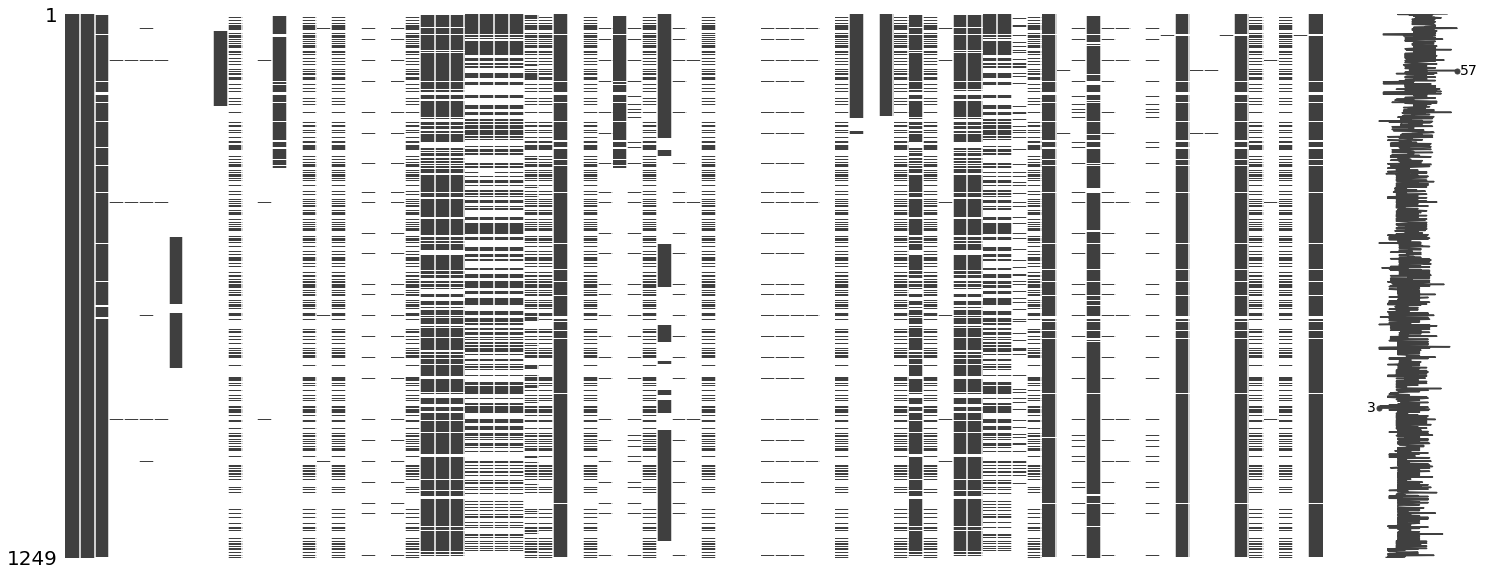

In [9]:
# example of one patient
msno.matrix(uke_df[uke_df['pat_id'] == "525108576"])

In [10]:
# Columns with highest missing values
nans_in_column = {}
for column in uke_df.columns:
    
    nans_perc = round(uke_df[column].isnull().sum() * 100 / len(uke_df[column]),1)
    nans = uke_df[column].isnull().sum()
    
    nans_in_column[column] = nans_perc

nans_in_column = {k: v for k, v in sorted(nans_in_column.items(), key=lambda item: item[1])}

for key, value in nans_in_column.items():
    print("{:>26} - {}%".format(key,value))

                    pat_id - 0.0%
                  rel_time - 0.0%
                  hf_vital - 12.0%
                spo2_vital - 13.9%
                temp_vital - 20.6%
                syst_vital - 23.2%
               mittl_vital - 23.3%
               diast_vital - 23.5%
                  af_vital - 33.4%
          katecholamin_med - 39.1%
          pupille_li_vital - 40.7%
          pupille_re_vital - 40.8%
                fio2_vital - 41.2%
         freq_gesamt_vital - 41.5%
                peep_vital - 41.6%
               ppeak_vital - 41.6%
               pmean_vital - 41.7%
           gcs_total_vital - 41.8%
        freq_spontan_vital - 41.9%
            gcs_auge_vital - 42.0%
          gcs_verbal_vital - 42.0%
           gcs_motor_vital - 42.2%
                opioid_med - 43.9%
                 icp_vital - 58.8%
                 cpp_vital - 59.7%
            narkotikum_med - 59.8%
         benzodiazepin_med - 66.4%
                   glu_bga - 68.8%
                    ph

- Labratory values are missing in 95-99.9% of the cases.
- Vital parameters are recorded most often.
- Blood gas alaysis has values at ~50% of the time
- Medications is really depending on the medicine, some are given often like opioids, others like 'direkter_vasolidator' almost never.

### Gender, age , height and weight of dataset

In [11]:
path = "../master-thesis/data/pat_id_data.csv"
uke_personal_data_df = pd.read_csv(path)
uke_personal_data_df = uke_personal_data_df[uke_personal_data_df["database"] == 'UKE']

In [12]:
uke_personal_data_df.head()

,pat_id,age,diagnose,outcome,sex,height,weight,length_of_stay,outcome_house,database
1634,123456798,1.0,MISC,exitus,Weiblich,96.0,NaN,0.319444,exitus,UKE
1635,474096103,21.0,TBI,survived,Weiblich,NaN,NaN,8.422222,survived,UKE
1636,474096129,74.0,TBI,survived,Weiblich,NaN,NaN,9.580555,survived,UKE
1637,474096889,34.0,TBI,survived,Männlich,NaN,NaN,18.909027,survived,UKE
1638,474096905,27.0,TBI,survived,Männlich,180.0,75.0,30.745833,survived,UKE


In [39]:
# check the number of patient_ids in each dataset
pat_id_personal_data = uke_personal_data_df['pat_id']
pat_id_uke = uke_df['pat_id'].unique() 
print("pat_id_personal_data: ",len(pat_id_personal_data))
print("pat_id_uke:           ",len(pat_id_uke))

# left-join the datasets
uke_complete_df = pd.merge(uke_df,uke_personal_data_df,on='pat_id',how='left')
uke_complete_df.head()

pat_id_personal_data:  1408
pat_id_uke:            1401


,pat_id,rel_time,af_vital,alt_labor,ast_labor,albumin_labor,alk_labor,alpha_blocker_med,barbiturat_med,basophile_labor,...,syst_vital,age,diagnose,outcome,sex,height,weight,length_of_stay,outcome_house,database
0,474096103,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,130.0,21.0,TBI,survived,Weiblich,NaN,NaN,8.422222,survived,UKE
1,474096103,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,134.0,21.0,TBI,survived,Weiblich,NaN,NaN,8.422222,survived,UKE
2,474096103,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,133.0,21.0,TBI,survived,Weiblich,NaN,NaN,8.422222,survived,UKE
3,474096103,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128.0,21.0,TBI,survived,Weiblich,NaN,NaN,8.422222,survived,UKE
4,474096103,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,125.0,21.0,TBI,survived,Weiblich,NaN,NaN,8.422222,survived,UKE


In [46]:
# Columns with highest missing values including the personal data of the patients

nans_in_column = {}
for column in uke_complete_df.columns:
    
    nans_perc = round(uke_complete_df[column].isnull().sum() * 100 / len(uke_complete_df[column]),1)
    nans = uke_complete_df[column].isnull().sum()
    
    nans_in_column[column] = nans_perc

nans_in_column = {k: v for k, v in sorted(nans_in_column.items(), key=lambda item: item[1])}

marker_columns = uke_personal_data_df.columns

for key, value in nans_in_column.items():
    if key in marker_columns:
        print("\033[95m{:>26} - {}%\033[0m".format(key,value))
    else:
        print("{:>26} - {}%".format(key,value))


                    pat_id - 0.0%
                  rel_time - 0.0%
                       age - 0.0%
                  diagnose - 0.0%
                   outcome - 0.0%
                       sex - 0.0%
             outcome_house - 0.0%
                  database - 0.0%
            length_of_stay - 0.4%
                  hf_vital - 12.0%
                spo2_vital - 13.9%
                    weight - 19.4%
                temp_vital - 20.6%
                syst_vital - 23.2%
               mittl_vital - 23.3%
               diast_vital - 23.5%
                    height - 33.1%
                  af_vital - 33.4%
          katecholamin_med - 39.1%
          pupille_li_vital - 40.7%
          pupille_re_vital - 40.8%
                fio2_vital - 41.2%
         freq_gesamt_vital - 41.5%
                peep_vital - 41.6%
               ppeak_vital - 41.6%
               pmean_vital - 41.7%
           gcs_total_vital - 41.8%
        freq_spontan_vital - 41.9%
            gcs_auge_vital - 

<AxesSubplot:xlabel='age', ylabel='Count'>

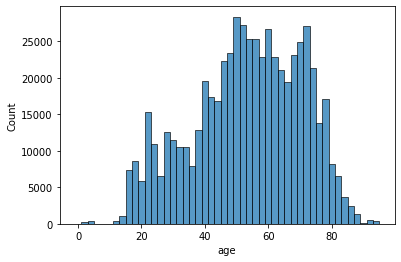

In [52]:
# Number of training samples by age
age = uke_complete_df['age'].dropna()
sns.histplot(age, binwidth=2)

<AxesSubplot:xlabel='weight', ylabel='Count'>

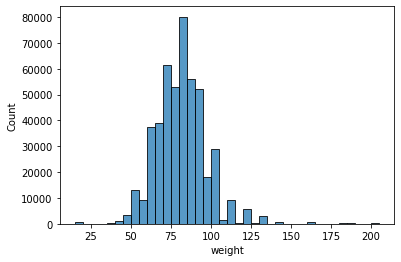

In [64]:
# Number of training samples by weigth
weight = uke_complete_df['weight'].dropna()
sns.histplot(weight, binwidth=5)

<AxesSubplot:xlabel='height', ylabel='Count'>

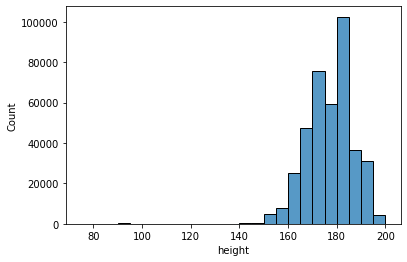

In [72]:
# Number of training samples by height
height = uke_complete_df['height'].dropna()
sns.histplot(height, binwidth=5)

<AxesSubplot:xlabel='sex', ylabel='Count'>

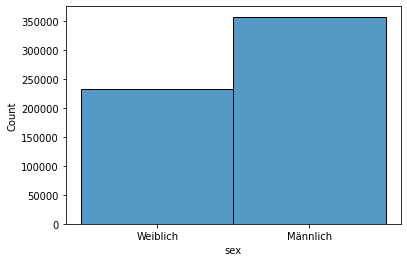

In [74]:
# Number of training samples by sex
sex = uke_complete_df['sex'].dropna()
sns.histplot(sex)

 - age, weight and height are pretty normally distributed.
 - We have significantly more male then female patient data. 
 - Due to the german population, minority groups are probably not very well represented. 

### Correlation between variables

<AxesSubplot:>

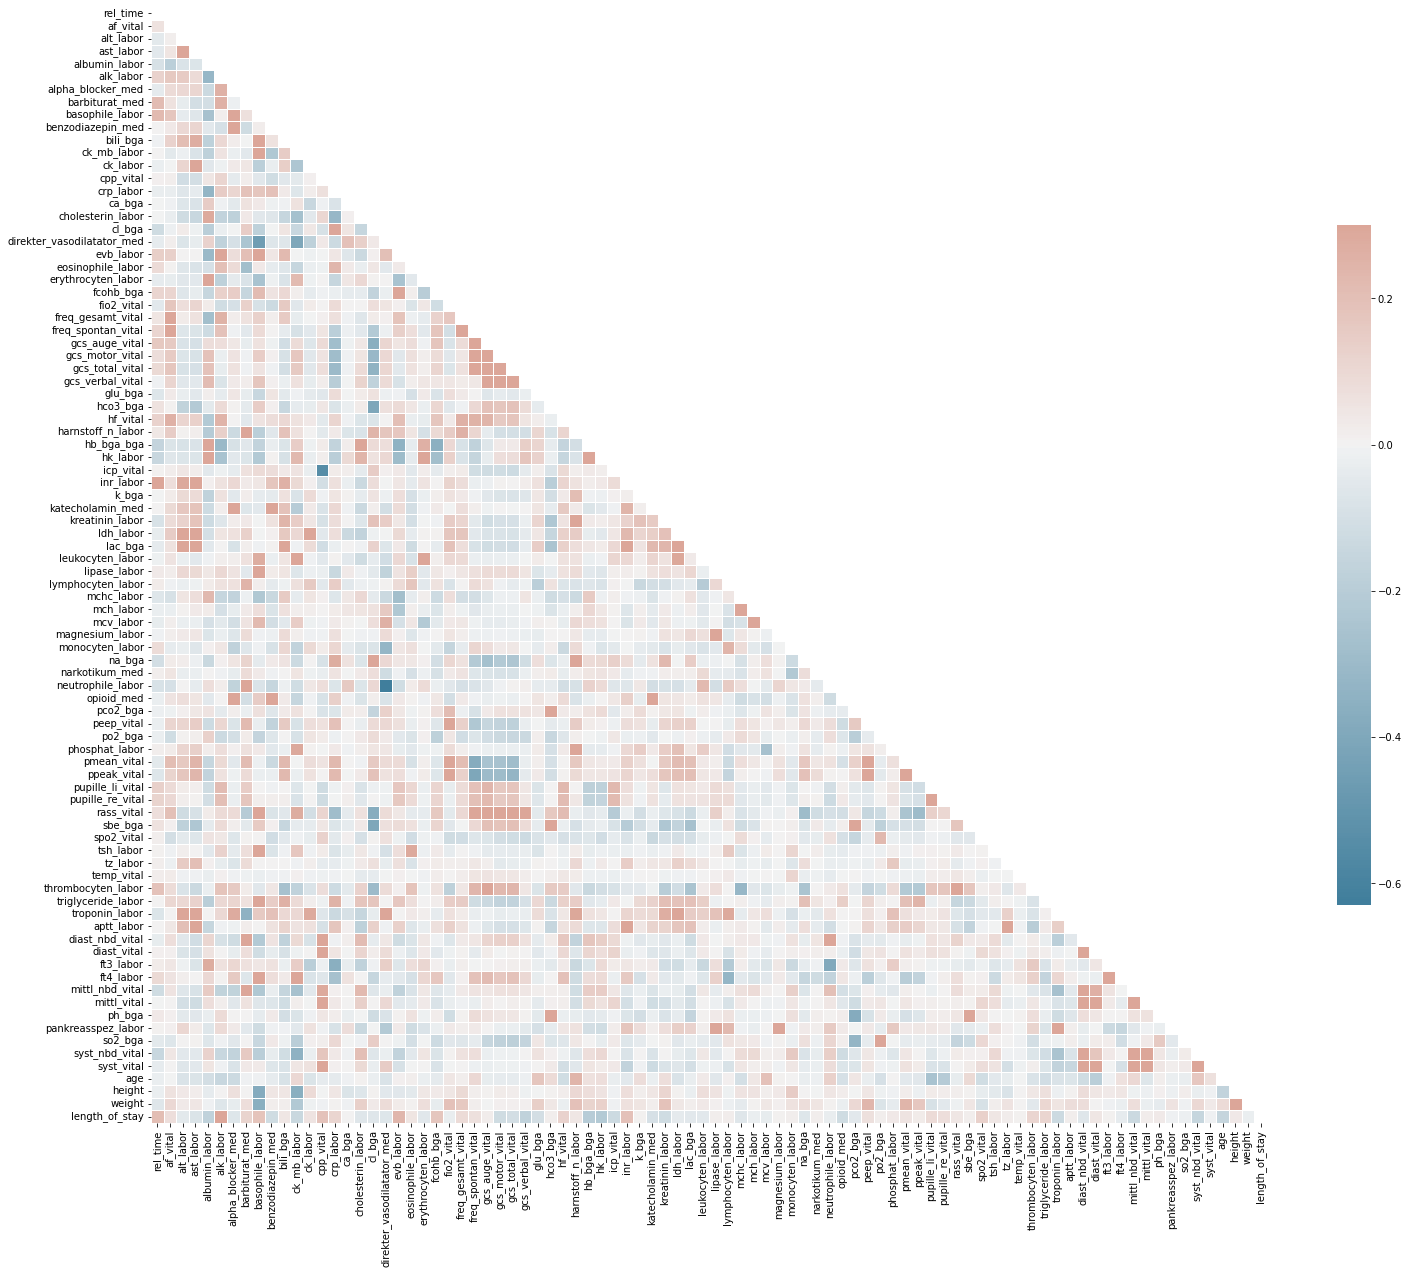

In [77]:
# Compute the correlation matrix
corr = uke_complete_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- **icp and cpp** have a high negative correlation, becasue cpp is calculated using the icp
- **neutrophile labor and direkter vasolidator med** have a high negative correlation, why is a question for nils

For the other values the correlations are very weak.